In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import streamlit as st

In [3]:
data = pd.read_excel("hhh2.xlsx")

In [40]:
data.head()

,index,FCO2_min,FCO2_max,FE_min,FE_max,HHI,ESG,SR,C_avg,P_avg,R_avg,C_max,P_max,R_max,FCO2_avg,FE_avg
0,Al-Au-Cu-Pd-Ta,2488.007975,2741.146741,19811.475384,21825.136317,0.240595,2.570058,0.616929,29.6,11.171179,0.104159,97,68610000,7000000000,2614.577358,20818.305850
1,Al-Mo-Ni-Ta-Zn,10.365383,11.438740,155.052803,170.947059,0.349353,2.840490,1.075585,17.2,1.008796,0.011266,46,68610000,7000000000,10.902062,162.999931
2,Al-Ir-Mo-Os-Ta,252.841226,278.353148,4233.529338,4665.651748,0.535919,3.019211,1.765671,54.8,2001.364091,88.535383,100,68610000,7000000000,265.597187,4449.590543
3,Al-Ir-Mo-Os-Ti,243.372445,267.902640,4090.501869,4507.970163,0.565674,3.310382,2.007496,49.2,2000.364882,88.524280,100,68610000,7000000000,255.637543,4299.236016
4,Al-Au-Cu-Pd-V,2480.579984,2732.949949,19699.061083,21701.291887,0.290745,2.871591,0.933709,40.4,10.196368,0.093080,97,68610000,7000000000,2606.764966,20700.176485


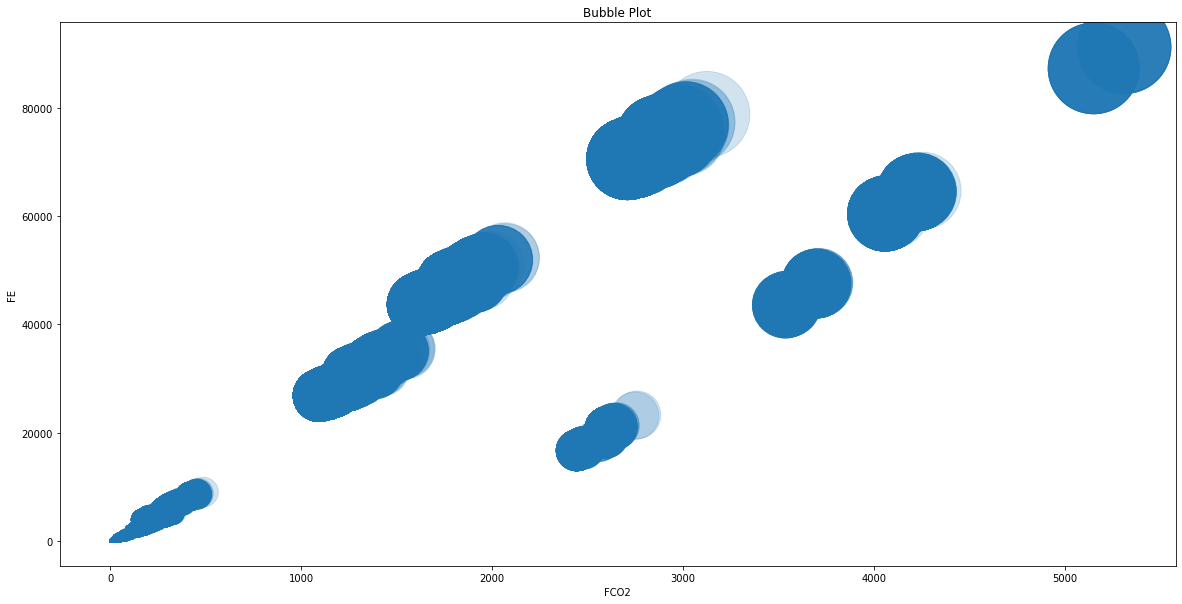

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

av_x = data[['FCO2_min', 'FCO2_max']].mean(axis=1)
av_y = data[['FE_min', 'FE_max']].mean(axis=1)

a = np.square(av_x - data['FCO2_min'])
b = np.square(av_y - data['FE_min'])

sizes = np.sqrt(a+b)*2
plt.figure(figsize=(20, 10))

# Create the bubble plot
plt.scatter(av_x, av_y, s=sizes, alpha=0.2)
plt.plot(1000,20000)

# Add labels and title to the plot
plt.xlabel('FCO2')
plt.ylabel('FE')
plt.title('Bubble Plot')

# Show the plot
plt.show()


In [14]:
data.columns

Index(['index', 'FCO2_min', 'FCO2_max', 'FE_min', 'FE_max', 'HHI', 'ESG', 'SR',
       'C_avg', 'P_avg', 'R_avg', 'C_max', 'P_max', 'R_max', 'FCO2_avg',
       'FE_avg'],
      dtype='object')

In [41]:
# 'HHI', 'ESG', 'SR','C_avg', 'P_avg', 'R_avg', 'C_max', 'P_max', 'R_max', 'FCO2_avg','FE_avg'
def graphe_HEA(x,y) :
    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))

    sns.scatterplot(x=x, y=y, data=data)
    plt.title(x+' vs '+y)
    plt.xlabel(x) 
    plt.ylabel(y)
    plt.show()


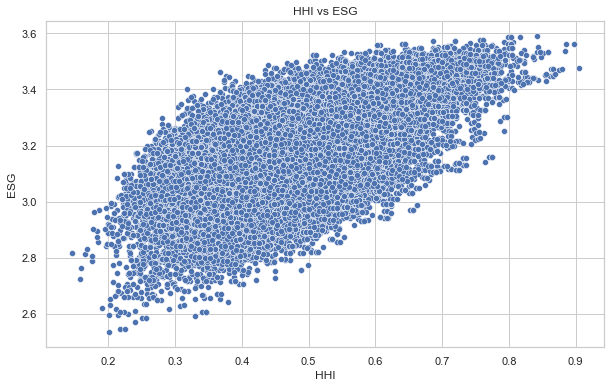

In [42]:
graphe_HEA('HHI','ESG')

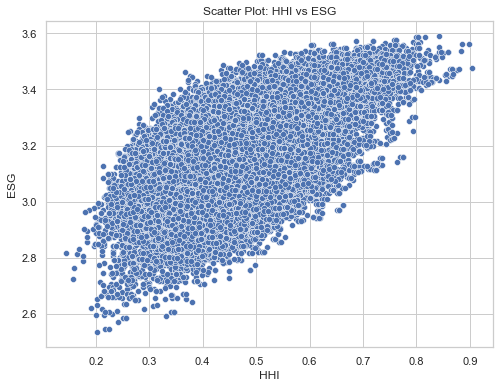

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import Tk, Frame, Label, OptionMenu, Button, StringVar
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_excel("hhh2.xlsx")

class ScatterPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Scatter Plot App")

        window_width = 800  
        window_height = 600 
        self.root.geometry(f"{window_width}x{window_height}")  

        self.frame = Frame(self.root)
        self.frame.pack(padx=20, pady=20)

        self.x_label = Label(self.frame, text="Select X Column:")
        self.x_label.grid(row=0, column=0)

        self.x_var = StringVar()
        self.x_menu = OptionMenu(self.frame, self.x_var, *df.columns)
        self.x_menu.grid(row=0, column=1)

        self.y_label = Label(self.frame, text="Select Y Column:")
        self.y_label.grid(row=1, column=0)

        self.y_var = StringVar()
        self.y_menu = OptionMenu(self.frame, self.y_var, *df.columns)
        self.y_menu.grid(row=1, column=1)

        self.plot_button = Button(self.frame, text="Plot Scatter Plot", command=self.plot)
        self.plot_button.grid(row=2, columnspan=2)

        self.figure, self.ax = plt.subplots(figsize=(8, 6))  
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.root)
        self.canvas.get_tk_widget().pack()

    def plot(self):
        x_col = self.x_var.get()
        y_col = self.y_var.get()

        if x_col and y_col:
            self.ax.clear()
            sns.scatterplot(data=df, x=x_col, y=y_col, ax=self.ax)
            self.ax.set_xlabel(x_col)
            self.ax.set_ylabel(y_col)
            self.ax.set_title(f"Scatter Plot: {x_col} vs {y_col}")
            self.canvas.draw()
        else:
            print("Select both X and Y columns.")

if __name__ == "__main__":
    root = Tk()
    app = ScatterPlotApp(root)
    root.mainloop()


-----------------------------------

-----------------------------------

In [43]:
import pandas as pd
import plotly.express as px
from tkinter import Tk, Frame, Label, OptionMenu, Button, StringVar
from PIL import Image, ImageTk

df = pd.read_excel("hhh2.xlsx")

class ScatterPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Scatter Plot App")

        window_width = 400  
        window_height = 400 
        self.root.geometry(f"{window_width}x{window_height}")  

        self.frame = Frame(self.root)
        self.frame.pack(padx=20, pady=20)

        self.x_label = Label(self.frame, text="Select X Column:")
        self.x_label.grid(row=1, column=0)

        self.x_var = StringVar()
        self.x_menu = OptionMenu(self.frame, self.x_var, *df.columns)
        self.x_menu.grid(row=1, column=1)

        self.y_label = Label(self.frame, text="Select Y Column:")
        self.y_label.grid(row=2, column=0)

        self.y_var = StringVar()
        self.y_menu = OptionMenu(self.frame, self.y_var, *df.columns)
        self.y_menu.grid(row=2, column=1)

        self.plot_button = Button(self.frame, text="Plot Scatter Plot", command=self.plot)
        self.plot_button.grid(row=3, columnspan=2)

        self.canvas = None  # No need for Matplotlib canvas when using Plotly

    def plot(self):
        x_col = self.x_var.get()
        y_col = self.y_var.get()

        if x_col and y_col:
            scatter_plot = px.scatter(df, x=x_col, y=y_col, hover_name='index')
            scatter_plot.update_layout(title=f"Scatter Plot: {x_col} vs {y_col}",
                                       xaxis_title=x_col,
                                       yaxis_title=y_col)
            scatter_plot.show()
        else:
            print("Select both X and Y columns.")

if __name__ == "__main__":
    root = Tk()
    app = ScatterPlotApp(root)
    root.mainloop()


-----------------------------------

-----------------------------------

# Decile

In [44]:
df.columns

Index(['index', 'FCO2_min', 'FCO2_max', 'FE_min', 'FE_max', 'HHI', 'ESG', 'SR',
       'C_avg', 'P_avg', 'R_avg', 'C_max', 'P_max', 'R_max', 'FCO2_avg',
       'FE_avg'],
      dtype='object')

In [45]:
df2 = pd.read_excel("hhh2.xlsx")

In [46]:
df2.columns

Index(['index', 'FCO2_min', 'FCO2_max', 'FE_min', 'FE_max', 'HHI', 'ESG', 'SR',
       'C_avg', 'P_avg', 'R_avg', 'C_max', 'P_max', 'R_max', 'FCO2_avg',
       'FE_avg'],
      dtype='object')

In [47]:
df2 = df2[['index','C_avg','FCO2_avg','SR', 'P_avg', 'R_avg']]

In [48]:
for col in ['C_avg','FCO2_avg','SR', 'P_avg', 'R_avg'] :
    deciles = df2[col].quantile(q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    # Fonction pour attribuer le décile à une valeur
    def assign_decile(value):
        for i, decile_value in enumerate(deciles):
            if value <= decile_value:
                return i + 1  # Les déciles sont numérotés de 1 à 10
        return 10  # Si la valeur est supérieure au 90e percentile, assigner le décile 10

    # Création de la colonne "SR_decile"
    new_col = col + "_Decile"
    df2[new_col] = df2[col].apply(assign_decile)


In [49]:
deciles

0.1     0.030651
0.2     0.071579
0.3     0.133460
0.4     0.315272
0.5     0.847110
0.6     0.913143
0.7     1.173593
0.8    88.509246
0.9    88.799289
Name: R_avg, dtype: float64

In [50]:
df2.columns

Index(['index', 'C_avg', 'FCO2_avg', 'SR', 'P_avg', 'R_avg', 'C_avg_Decile',
       'FCO2_avg_Decile', 'SR_Decile', 'P_avg_Decile', 'R_avg_Decile'],
      dtype='object')

In [51]:
Decile = df2[['index',
       'C_avg_Decile', 'FCO2_avg_Decile', 'SR_Decile', 'P_avg_Decile',
       'R_avg_Decile']]

In [52]:
Decile

,index,C_avg_Decile,FCO2_avg_Decile,SR_Decile,P_avg_Decile,R_avg_Decile
0,Al-Au-Cu-Pd-Ta,2,10,1,3,3
1,Al-Mo-Ni-Ta-Zn,1,1,1,1,1
2,Al-Ir-Mo-Os-Ta,6,6,6,9,9
3,Al-Ir-Mo-Os-Ti,5,6,8,9,9
4,Al-Au-Cu-Pd-V,3,10,1,3,3
...,...,...,...,...,...,...
30196,Nb-Ti-V-Zn-Zr,3,1,3,1,1
30197,Nb-Ti-W-Zn-Zr,1,1,4,1,1
30198,Ta-Ti-V-W-Zn,1,1,3,2,1
30199,Ta-Ti-V-W-Zr,4,1,3,2,1


In [53]:
Decile.to_excel("Decile.xlsx", index=False)

In [4]:
Decile =  pd.read_excel("Decile.xlsx")

In [6]:
Decile

,index,C_avg_Decile,FCO2_avg_Decile,SR_Decile,P_avg_Decile,R_avg_Decile,HERowS_Score
0,Al-Au-Cu-Pd-Ta,2,10,1,3,3,19
1,Al-Mo-Ni-Ta-Zn,1,1,1,1,1,5
2,Al-Ir-Mo-Os-Ta,6,6,6,9,9,36
3,Al-Ir-Mo-Os-Ti,5,6,8,9,9,37
4,Al-Au-Cu-Pd-V,3,10,1,3,3,20
...,...,...,...,...,...,...,...
30196,Nb-Ti-V-Zn-Zr,3,1,3,1,1,9
30197,Nb-Ti-W-Zn-Zr,1,1,4,1,1,8
30198,Ta-Ti-V-W-Zn,1,1,3,2,1,8
30199,Ta-Ti-V-W-Zr,4,1,3,2,1,11


In [47]:
abc = Decile[["index","FCO2_avg_Decile"]][Decile["FCO2_avg_Decile"] == 5]
abc

,index,FCO2_avg_Decile
54,Al-Ir-Mo-Re-Ru,5
56,Al-Ir-Mo-Re-Sc,5
91,Al-Mo-Os-Re-Sc,5
92,Al-Mo-Os-Re-Si,5
97,Al-Mo-Os-Re-Ta,5
...,...,...
29875,Pd-Re-Ta-Ti-Zr,5
29882,Pd-Re-Ta-V-W,5
29903,Pd-Re-Ti-V-W,5
29908,Pd-Re-Ti-W-Zr,5


In [49]:
import pandas as pd
from collections import defaultdict

element_counts = defaultdict(int)

# Parcourir chaque ligne du DataFrame
for index_value in abc["index"]:
    elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
    for element in elements:
        element_counts[element] += 1  # Incrémenter le compteur d'occurrences

# Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
element_counts_regular = dict(element_counts)

# Afficher le dictionnaire de comptage des occurrences
print(element_counts_regular)

{'Al': 462, 'Ir': 188, 'Mo': 600, 'Re': 1228, 'Ru': 1226, 'Sc': 513, 'Os': 1677, 'Si': 328, 'Ta': 886, 'Co': 402, 'Mg': 120, 'Ti': 558, 'V': 575, 'W': 492, 'Zn': 363, 'Cu': 134, 'Ni': 520, 'Zr': 323, 'Cr': 350, 'Mn': 442, 'Ag': 15, 'Cd': 45, 'Nb': 716, 'Pd': 1155, 'Ge': 199, 'Ga': 317, 'Hf': 319, 'In': 58, 'As': 199, 'Y': 33, 'Fe': 515, 'Sn': 41, 'Te': 47, 'Sb': 38, 'Bi': 3, 'Pb': 9, 'Hg': 4}


In [50]:
import plotly.graph_objects as go

# Sample data
a = list(element_counts_regular.keys())
b = list(element_counts_regular.values())

# Create a figure
fig = go.Figure()

# Add the Pie of Bar Chart
fig.add_trace(go.Barpolar(
    r=b,
    theta=a,
    text=a,
    hoverinfo='text+r',
))

# Update the layout
fig.update_layout(
    title="Circular Barplot",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(direction="clockwise"),
    )
)

# Show the plot
fig.show()


In [65]:
[1,2,3,4,5,6][1:-1]

[2, 3, 4, 5]

In [58]:
def circular_barplot_var_decile(var,decile):
    element_counts_regular = {}
    a=[]
    b = []
    element_counts = {}
    
    selected_data = Decile[["index",var]][Decile[var] == decile]
    
    element_counts = defaultdict(int)
    
    for index_value in selected_data["index"]:
        elements = index_value.split("-")  
        for element in elements:
            element_counts[element] += 1  
    element_counts_regular = dict(element_counts)
    
    a = list(element_counts_regular.keys())
    b = list(element_counts_regular.values())
    fig = go.Figure()
    fig.add_trace(go.Barpolar(r=b,theta=a,text=a,hoverinfo='text+r',))
    fig.update_layout(
    title="Circular Barplot",
    polar=dict(radialaxis=dict(showticklabels=False, ticks=''),angularaxis=dict(direction="clockwise"),))
    fig.show()

In [64]:
circular_barplot_var_decile("P_avg_Decile",2)

                index  P_avg_Decile
6       Al-Pd-Ti-Y-Zr             2
8      Al-Pd-Ti-Zn-Zr             2
27     Al-Ir-Mo-Pd-Ti             2
29     Al-Ir-Mo-Pd-Zr             2
41     Al-Cu-Nb-Ta-Ti             2
...               ...           ...
30192    Nb-Ta-V-W-Zr             2
30193   Nb-Ta-V-Zn-Zr             2
30198    Ta-Ti-V-W-Zn             2
30199    Ta-Ti-V-W-Zr             2
30200   Ta-Ti-V-Zn-Zr             2

[3020 rows x 2 columns]


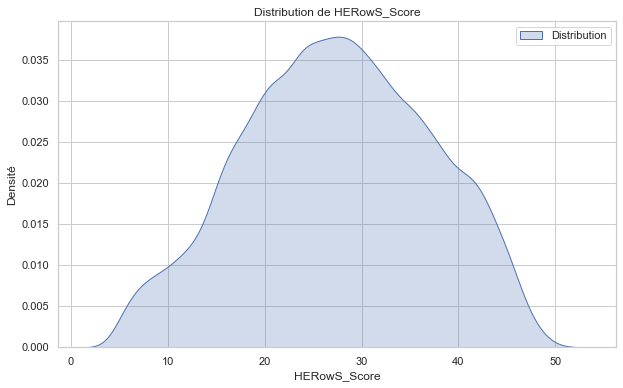

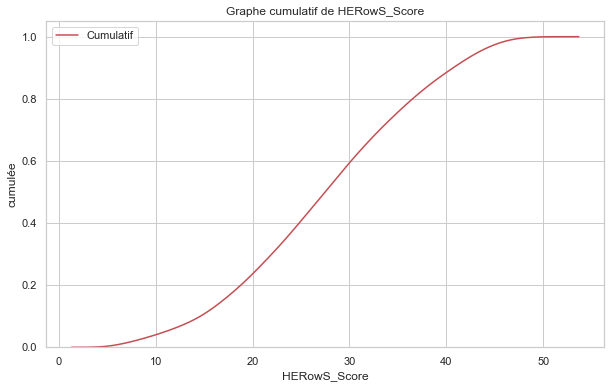

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


# Tracer la distribution
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=Decile["HERowS_Score"], shade=True, color="b", label="Distribution")
plt.xlabel("HERowS_Score")
plt.ylabel("Densité")
plt.title("Distribution de HERowS_Score")
plt.legend()
plt.show()

# Tracer le graphe cumulatif
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.kdeplot(data=Decile["HERowS_Score"], cumulative=True, color="r", label="Cumulatif")
plt.xlabel("HERowS_Score")
plt.ylabel("cumulée")
plt.title("Graphe cumulatif de HERowS_Score")
plt.legend()
plt.show()


In [114]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Sample data (replace this with your data)
data = {
    "HERowS_Score": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
Decile = pd.DataFrame(data)

# Calculate KDE
density = np.histogram(Decile["HERowS_Score"], bins=30, density=True)
cumulative_density = np.cumsum(density[0]) * np.diff(density[1])[0]

# Create cumulative KDE plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=density[1][1:], y=cumulative_density, mode='lines', fill='tozeroy'))

# Update layout
fig.update_layout(
    title="Cumulative KDE of HERowS_Score",
    xaxis_title="HERowS_Score",
    yaxis_title="Cumulative Density",
)

# Display the plot
st.plotly_chart(fig)


2023-08-19 04:49:20.481 
  command:

    streamlit run c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [103]:
list(Decile["HERowS_Score"])

[19,
 5,
 36,
 37,
 20,
 42,
 16,
 40,
 13,
 37,
 40,
 20,
 10,
 10,
 7,
 8,
 30,
 40,
 31,
 12,
 32,
 31,
 8,
 31,
 32,
 21,
 35,
 21,
 33,
 23,
 33,
 9,
 32,
 32,
 40,
 39,
 42,
 22,
 33,
 31,
 33,
 7,
 23,
 7,
 27,
 34,
 25,
 37,
 37,
 35,
 32,
 26,
 34,
 36,
 35,
 41,
 34,
 40,
 25,
 44,
 42,
 23,
 34,
 18,
 24,
 8,
 35,
 29,
 6,
 39,
 27,
 6,
 6,
 37,
 5,
 6,
 34,
 5,
 24,
 38,
 27,
 40,
 7,
 6,
 6,
 43,
 36,
 5,
 24,
 32,
 9,
 39,
 35,
 16,
 5,
 15,
 6,
 33,
 11,
 39,
 34,
 26,
 39,
 5,
 37,
 26,
 34,
 35,
 5,
 34,
 37,
 6,
 45,
 35,
 6,
 29,
 9,
 35,
 26,
 25,
 22,
 40,
 15,
 38,
 8,
 24,
 26,
 18,
 6,
 29,
 23,
 27,
 43,
 28,
 36,
 26,
 7,
 37,
 23,
 26,
 35,
 7,
 40,
 8,
 9,
 38,
 9,
 35,
 29,
 38,
 28,
 24,
 26,
 27,
 26,
 31,
 18,
 26,
 14,
 35,
 29,
 13,
 36,
 41,
 30,
 29,
 39,
 13,
 39,
 13,
 7,
 27,
 16,
 17,
 15,
 27,
 17,
 12,
 31,
 11,
 29,
 16,
 15,
 33,
 31,
 36,
 32,
 34,
 26,
 12,
 25,
 31,
 17,
 24,
 27,
 29,
 15,
 15,
 26,
 23,
 26,
 12,
 29,
 15,
 15,
 12,
 29,

In [62]:
sorted_decile = Decile.sort_values(by="HERowS_Score")
selected_rows = sorted_decile.head(600)
selected_rows

,index,C_avg_Decile,FCO2_avg_Decile,SR_Decile,P_avg_Decile,R_avg_Decile,HERowS_Score
15961,Co-Cr-Fe-Mn-Zn,1,1,1,1,1,5
2567,Al-Cr-Fe-Ti-Zn,1,1,1,1,1,5
21568,Fe-Mn-Ta-W-Zn,1,1,1,1,1,5
12182,Cu-Ni-Ti-Zn-Zr,1,1,1,1,1,5
2563,Al-Cr-Fe-Ta-Zn,1,1,1,1,1,5
...,...,...,...,...,...,...,...
1164,Al-Mo-Ta-W-Zr,3,1,1,2,1,8
2423,Ag-Cd-Mg-Sn-Zn,3,1,1,1,2,8
774,Al-Cr-Nb-Ta-V,1,1,3,2,1,8
27910,Mn-Mo-Ta-W-Zr,3,1,1,2,1,8


In [69]:
sorted_decile = Decile.sort_values(by="HERowS_Score")
selected_rows_10 = sorted_decile.head(600)
selected_rows_10

,index,C_avg_Decile,FCO2_avg_Decile,SR_Decile,P_avg_Decile,R_avg_Decile,HERowS_Score
15961,Co-Cr-Fe-Mn-Zn,1,1,1,1,1,5
2567,Al-Cr-Fe-Ti-Zn,1,1,1,1,1,5
21568,Fe-Mn-Ta-W-Zn,1,1,1,1,1,5
12182,Cu-Ni-Ti-Zn-Zr,1,1,1,1,1,5
2563,Al-Cr-Fe-Ta-Zn,1,1,1,1,1,5
...,...,...,...,...,...,...,...
1164,Al-Mo-Ta-W-Zr,3,1,1,2,1,8
2423,Ag-Cd-Mg-Sn-Zn,3,1,1,1,2,8
774,Al-Cr-Nb-Ta-V,1,1,3,2,1,8
27910,Mn-Mo-Ta-W-Zr,3,1,1,2,1,8


In [70]:
import pandas as pd
from collections import defaultdict

# Supposons que vous ayez un DataFrame nommé selected_rows avec une colonne "index"
# selected_rows = ...

# Initialisation d'un dictionnaire pour compter les occurrences
element_counts = defaultdict(int)

# Parcourir chaque ligne du DataFrame
for index_value in selected_rows_10["index"]:
    elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
    for element in elements:
        element_counts[element] += 1  # Incrémenter le compteur d'occurrences

# Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
element_counts_regular = dict(element_counts)

# Afficher le dictionnaire de comptage des occurrences
print(element_counts_regular)

{'Co': 68, 'Cr': 235, 'Fe': 303, 'Mn': 272, 'Zn': 220, 'Al': 224, 'Ti': 240, 'Ta': 327, 'W': 135, 'Cu': 48, 'Ni': 148, 'Zr': 67, 'V': 163, 'As': 11, 'Mo': 299, 'Nb': 154, 'Si': 71, 'Mg': 2, 'Sn': 4, 'Ag': 3, 'Ir': 1, 'Hf': 1, 'Ga': 3, 'Cd': 1}


In [71]:
import plotly.graph_objects as go

# Sample data
a = list(element_counts_regular.keys())
b = list(element_counts_regular.values())

# Create a figure
fig = go.Figure()

# Add the Pie of Bar Chart
fig.add_trace(go.Barpolar(
    r=b,
    theta=a,
    text=a,
    hoverinfo='text+r',
))

# Update the layout
fig.update_layout(
    title="Circular Barplot",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(direction="clockwise"),
    )
)

# Show the plot
fig.show()


-----------------

In [8]:
import pandas as pd
from collections import defaultdict

# Supposons que vous ayez un DataFrame nommé selected_rows avec une colonne "index"
# selected_rows = ...

# Initialisation d'un dictionnaire pour compter les occurrences
element_counts = defaultdict(int)

# Parcourir chaque ligne du DataFrame
for index_value in selected_rows["index"]:
    elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
    for element in elements:
        element_counts[element] += 1  # Incrémenter le compteur d'occurrences

# Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
element_counts_regular = dict(element_counts)

# Afficher le dictionnaire de comptage des occurrences
print(element_counts_regular)


{'Co': 68, 'Cr': 235, 'Fe': 303, 'Mn': 272, 'Zn': 220, 'Al': 224, 'Ti': 240, 'Ta': 327, 'W': 135, 'Cu': 48, 'Ni': 148, 'Zr': 67, 'V': 163, 'As': 11, 'Mo': 299, 'Nb': 154, 'Si': 71, 'Mg': 2, 'Sn': 4, 'Ag': 3, 'Ir': 1, 'Hf': 1, 'Ga': 3, 'Cd': 1}


In [9]:
sorted_elements = sorted(element_counts_regular.items(), key=lambda x: x[1], reverse=True)

# Create a new dictionary from the sorted list of tuples
sorted_dict = dict(sorted_elements)

print(sorted_dict)

{'Ta': 327, 'Fe': 303, 'Mo': 299, 'Mn': 272, 'Ti': 240, 'Cr': 235, 'Al': 224, 'Zn': 220, 'V': 163, 'Nb': 154, 'Ni': 148, 'W': 135, 'Si': 71, 'Co': 68, 'Zr': 67, 'Cu': 48, 'As': 11, 'Sn': 4, 'Ag': 3, 'Ga': 3, 'Mg': 2, 'Ir': 1, 'Hf': 1, 'Cd': 1}


In [10]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 
        

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [11]:
import plotly.graph_objects as go

# Sample data
a = list(element_counts_regular.keys())
b = list(element_counts_regular.values())

# Create a figure
fig = go.Figure()

# Add the Pie of Bar Chart
fig.add_trace(go.Barpolar(
    r=b,
    theta=a,
    text=a,
    hoverinfo='text+r',
))

# Update the layout
fig.update_layout(
    title="Circular Barplot",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(direction="clockwise"),
    )
)

# Show the plot
fig.show()


In [13]:
import pandas as pd
import plotly.express as px
from tkinter import Tk, Frame, Label, OptionMenu, Button, StringVar
from PIL import Image, ImageTk

df = pd.read_excel("hhh2.xlsx")

class ScatterPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Scatter Plot App")

        window_width = 800  
        window_height = 600 
        self.root.geometry(f"{window_width}x{window_height}")  

        self.frame = Frame(self.root)
        self.frame.pack(padx=20, pady=20)

        self.x_label = Label(self.frame, text="Select X Column:")
        self.x_label.grid(row=1, column=0)

        self.x_var = StringVar()
        self.x_menu = OptionMenu(self.frame, self.x_var, *df.columns)
        self.x_menu.grid(row=1, column=1)

        self.y_label = Label(self.frame, text="Select Y Column:")
        self.y_label.grid(row=2, column=0)

        self.y_var = StringVar()
        self.y_menu = OptionMenu(self.frame, self.y_var, *df.columns)
        self.y_menu.grid(row=2, column=1)

        self.plot_button = Button(self.frame, text="Plot Scatter Plot", command=self.plot)
        self.plot_button.grid(row=3, columnspan=2)

        self.canvas = None  # No need for Matplotlib canvas when using Plotly

    def plot(self):
        x_col = self.x_var.get()
        y_col = self.y_var.get()

        if x_col and y_col:
            scatter_plot = px.scatter(df, x=x_col, y=y_col, hover_name='Elements ')
            scatter_plot.update_layout(title=f"Scatter Plot: {x_col} vs {y_col}",
                                       xaxis_title=x_col,
                                       yaxis_title=y_col)
            scatter_plot.show()
        else:
            print("Select both X and Y columns.")

if __name__ == "__main__":
    root = Tk()
    app = ScatterPlotApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\pc\appdata\local\programs\python\python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\pc\AppData\Local\Temp/ipykernel_8176/3393570929.py", line 44, in plot
    scatter_plot = px.scatter(df, x=x_col, y=y_col, hover_name='Elements ')
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\plotly\express\_chart_types.py", line 66, in scatter
    return make_figure(args=locals(), constructor=go.Scatter)
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\plotly\express\_core.py", line 1990, in make_figure
    args = build_dataframe(args, constructor)
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\plotly\express\_core.py", line 1405, in build_dataframe
    df_output, wide_id_vars = process_args_into_dataframe(
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\

-------------

KeyError: 'HERowS_Score'

In [12]:
import pandas as pd
from collections import defaultdict

# Supposons que vous ayez un DataFrame nommé selected_rows avec une colonne "index"
# selected_rows = ...

# Initialisation d'un dictionnaire pour compter les occurrences
element_counts = defaultdict(int)

# Parcourir chaque ligne du DataFrame
for index_value in data["index"]:
    elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
    for element in elements:
        element_counts[element] += 1  # Incrémenter le compteur d'occurrences

# Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
element_counts_regular = dict(element_counts)

# Afficher le dictionnaire de comptage des occurrences
print(element_counts_regular)

{'Al': 4469, 'Au': 1082, 'Cu': 1433, 'Pd': 5475, 'Ta': 7629, 'Mo': 7455, 'Ni': 6324, 'Zn': 4114, 'Ir': 7206, 'Os': 7423, 'Ti': 6382, 'V': 7286, 'Y': 331, 'Zr': 2978, 'W': 6297, 'Co': 4533, 'Pt': 6556, 'Re': 7259, 'Rh': 6486, 'Ru': 6495, 'Fe': 6023, 'Si': 3442, 'As': 2405, 'Ga': 3213, 'Sb': 285, 'Nb': 7932, 'Te': 534, 'Sc': 1844, 'Ag': 172, 'Hf': 3415, 'Hg': 54, 'In': 368, 'Cr': 4863, 'Mn': 5254, 'Mg': 700, 'Bi': 155, 'Ge': 2352, 'Sn': 325, 'Cd': 365, 'Pb': 91}


In [11]:
import plotly.graph_objects as go

# Sample data
a = list(element_counts_regular.keys())
b = list(element_counts_regular.values())

# Create a figure
fig = go.Figure()

# Add the Pie of Bar Chart
fig.add_trace(go.Barpolar(
    r=b,
    theta=a,
    text=a,
    title_x=0.5,
    hoverinfo='text+r',
))

# Update the layout
fig.update_layout(
    title="Circular Barplot",
    polar=dict(
        radialaxis=dict(showticklabels=False, ticks=''),
        angularaxis=dict(direction="clockwise"),
    )
)

# Show the plot
fig.show()


NameError: name 'element_counts_regular' is not defined

In [87]:
sorted_decile = Decile.sort_values(by="HERowS_Score")
selected_rows_10 = sorted_decile.head(300)
selected_rows_10

,index,C_avg_Decile,FCO2_avg_Decile,SR_Decile,P_avg_Decile,R_avg_Decile,HERowS_Score
15961,Co-Cr-Fe-Mn-Zn,1,1,1,1,1,5
2567,Al-Cr-Fe-Ti-Zn,1,1,1,1,1,5
21568,Fe-Mn-Ta-W-Zn,1,1,1,1,1,5
12182,Cu-Ni-Ti-Zn-Zr,1,1,1,1,1,5
2563,Al-Cr-Fe-Ta-Zn,1,1,1,1,1,5
...,...,...,...,...,...,...,...
1889,Al-Ta-Ti-V-Zn,1,1,1,2,1,6
1899,Al-Ta-Ti-Zn-Zr,2,1,1,1,1,6
9124,Cr-Mn-Mo-Si-Ti,1,1,2,1,1,6
29463,Mn-Nb-Ta-Ti-Zn,1,1,1,2,1,6


In [88]:
import pandas as pd
from collections import defaultdict

element_counts = defaultdict(int)

# Parcourir chaque ligne du DataFrame
for index_value in selected_rows_10["index"]:
    elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
    for element in elements:
        element_counts[element] += 1  # Incrémenter le compteur d'occurrences

# Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
element_counts_regular = dict(element_counts)

# Afficher le dictionnaire de comptage des occurrences
print(element_counts_regular)

{'Co': 31, 'Cr': 135, 'Fe': 177, 'Mn': 153, 'Zn': 137, 'Al': 125, 'Ti': 125, 'Ta': 162, 'W': 48, 'Cu': 27, 'Ni': 67, 'Zr': 22, 'V': 55, 'As': 5, 'Mo': 161, 'Nb': 41, 'Si': 27, 'Mg': 1, 'Sn': 1}


In [89]:
a = list(element_counts_regular.keys())
b = list(element_counts_regular.values())
fig = go.Figure()
fig.add_trace(go.Barpolar(r=b,theta=a,text=a,hoverinfo='text+r',))
fig.update_layout(
title="Circular Barplot",
polar=dict(radialaxis=dict(showticklabels=False, ticks=''),angularaxis=dict(direction="clockwise"),))
fig.show()

In [95]:
def circular_barplot_best_600(etat , n):
    sorted_decile = Decile.sort_values(by="HERowS_Score")
    if etat == 'best' : 
        selected_rows_10 = sorted_decile.head(n)
    else :
        selected_rows_10 = sorted_decile.tail(n)
    
    element_counts = defaultdict(int)
    for index_value in selected_rows_10["index"]:
        elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
        for element in elements:
            element_counts[element] += 1  # Incrémenter le compteur d'occurrences

    # Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
    element_counts_regular = dict(element_counts)
    
    a = list(element_counts_regular.keys())
    b = list(element_counts_regular.values())
    fig = go.Figure()
    fig.add_trace(go.Barpolar(r=b,theta=a,text=a,hoverinfo='text+r',))
    fig.update_layout(
    title="Circular Barplot",
    polar=dict(radialaxis=dict(showticklabels=False, ticks=''),angularaxis=dict(direction="clockwise"),))
    fig.show()

In [97]:
circular_barplot_best_600("dfdf",5)

In [ ]:
def circular_barplot_best_600(etat , n):
    element_counts_regular = {}
    a = []
    b = []
    element_counts = {}
    sorted_decile = Decile.sort_values(by="HERowS_Score")
    if etat == 'best' : 
        selected_rows_10 = sorted_decile.head(n)
    else :
        selected_rows_10 = sorted_decile.tail(n)
    
    element_counts = defaultdict(int)
    for index_value in selected_rows_10["index"]:
        elements = index_value.split("-")  # Diviser la valeur en éléments chimiques
        for element in elements:
            element_counts[element] += 1  # Incrémenter le compteur d'occurrences

    # Convertir le dictionnaire en un dictionnaire régulier (si nécessaire)
    element_counts_regular = dict(element_counts)
    
    a = list(element_counts_regular.keys())
    b = list(element_counts_regular.values())
    fig = go.Figure()
    fig.add_trace(go.Barpolar(r=b,theta=a,text=a,hoverinfo='text+r',))
    fig.update_layout(
    title="Circular Barplot",
    polar=dict(radialaxis=dict(showticklabels=False, ticks=''),angularaxis=dict(direction="clockwise"),))
    return fig